### AAKANKSHA BHAGURE 
### 21102A0050 CMPN A 
### Git hub link- https://github.com/aakanksha0250/Graph-Based-Clustering.git

In [36]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import normalize

In [ ]:
def load_facebook_data(ego_network_ids):
    graphs = []
    for ego_id in ego_network_ids:
        base_dir = r"D:\Noels Stuff\COLLEGE\ML\lab 9\facebook"
        edges_file = f"{base_dir}\{ego_id}.edges"
        feat_file = f"{base_dir}\{ego_id}.feat"
        featnames_file = f"{base_dir}\{ego_id}.featnames"
        
        # Load edges (social connections)
        edges = pd.read_csv(edges_file, sep=' ', header=None)
        
        # Load node features and names (optional, for advanced analysis)
        features = pd.read_csv(feat_file, sep=' ', header=None)
        feature_names = pd.read_csv(featnames_file, header=None)
        
        # Construct the graph
        G = nx.Graph()
        G.add_edges_from(edges.values)
        
        # Optionally, add features to the graph nodes
        for i, node in enumerate(G.nodes()):
            G.nodes[node]['features'] = features.iloc[i].values
        
        graphs.append(G)
    
    return graphs

In [25]:
# Combine multiple ego networks
ego_network_ids = [0, 107, 348, 414, 686, 698, 1684, 1912, 3437] 
facebook_graphs = load_facebook_data(ego_network_ids)


In [26]:
combined_graph = nx.compose_all(facebook_graphs)
adj_matrix = nx.adjacency_matrix(combined_graph).todense()

In [37]:
def apply_spectral_clustering(adj_matrix, n_clusters):
    # Normalize the adjacency matrix
    adj_matrix_normalized = normalize(adj_matrix, norm='l1', axis=1)
    
    # Apply Spectral Clustering
    spectral_model = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
    labels = spectral_model.fit_predict(adj_matrix_normalized)
    
    return labels


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\manifold\_spectral_embedding.py:275: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Facebook Graph Silhouette Score: -1.0


In [38]:
# Visualize the clustering results (optional)
def visualize_clustering(G, labels, title):
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G, seed=42)
    cmap = plt.get_cmap('viridis')
    nx.draw(G, pos, node_color=labels, with_labels=True, node_size=50, cmap=cmap)
    plt.title(title)
    plt.show()

In [39]:

# Apply spectral clustering on the combined Facebook graph's adjacency matrix
n_clusters_fb = 3  # Experiment with different cluster numbers
facebook_labels = apply_spectral_clustering(adj_matrix, n_clusters_fb)

# Evaluate the clustering using Silhouette Score
facebook_silhouette_score = silhouette_score(adj_matrix, facebook_labels, metric='precomputed')
print(f"Facebook Graph Silhouette Score: {facebook_silhouette_score}")

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\manifold\_spectral_embedding.py:275: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Facebook Graph Silhouette Score: -1.0


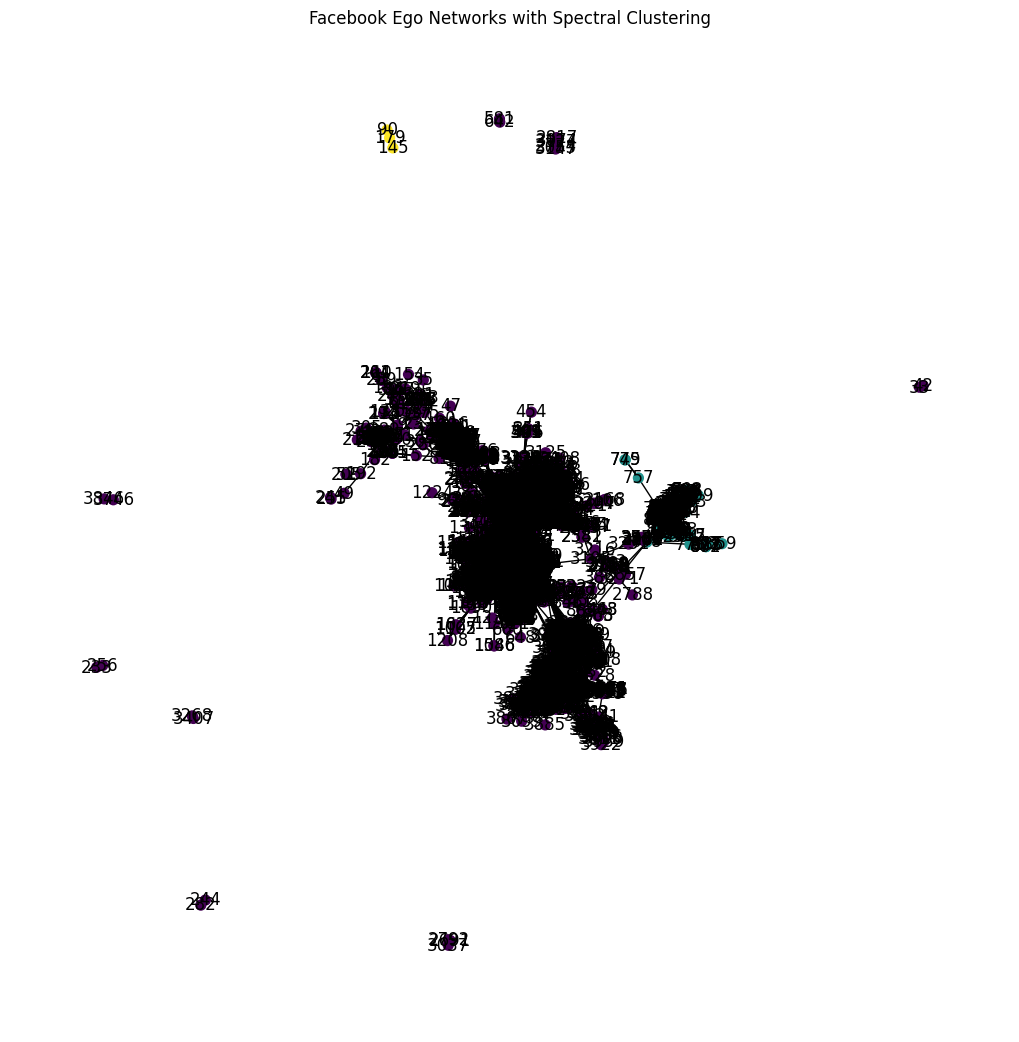

In [40]:
# Visualize the clusters on the Facebook graph
visualize_clustering(combined_graph, facebook_labels, "Facebook Ego Networks with Spectral Clustering")


In [ ]:
## 2.1 Load Enron Dataset
enron_df = pd.read_csv(r"D:\Noels Stuff\COLLEGE\ML\lab 9\archive\emails.csv")  
enron_df = enron_df[:5000]


In [34]:
email_pairs = enron_df.groupby(['file', 'message']).size().reset_index(name='count')

# Create a graph based on the frequency of communication
email_graph = nx.Graph()
for i, row in email_pairs.iterrows():
    email_graph.add_edge(row['file'], row['message'], weight=row['count'])

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(enron_df['message'])

# Compute cosine similarity between emails
cosine_sim = cosine_similarity(tfidf_matrix)

# Create a similarity graph where nodes represent emails
email_content_graph = nx.Graph()
for i in range(len(enron_df)):
    for j in range(i + 1, len(enron_df)):
        similarity = cosine_sim[i, j]
        if similarity > 0.5:  # Choose a threshold for similarity
            email_content_graph.add_edge(enron_df['file'][i], enron_df['file'][j], weight=similarity)

# Visualize or analyze the graphs
print("Facebook Graph Adjacency Matrix:", adj_matrix)
print("Email Communication Frequency Graph:", email_graph)
print("Email Content Similarity Graph:", email_content_graph)

Facebook Graph Adjacency Matrix: [[0 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Email Communication Frequency Graph: Graph with 10000 nodes and 5000 edges
Email Content Similarity Graph: Graph with 4728 nodes and 25237 edges


In [41]:
## 2.3 Create adjacency matrix for the Enron email communication graph
enron_adj_matrix = nx.adjacency_matrix(email_graph).todense()

# Apply spectral clustering on the Enron email graph's adjacency matrix
n_clusters_enron = 4  # Experiment with different cluster numbers
enron_labels = apply_spectral_clustering(enron_adj_matrix, n_clusters_enron)

# Evaluate the clustering using Silhouette Score
enron_silhouette_score = silhouette_score(enron_adj_matrix, enron_labels, metric='precomputed')
print(f"Enron Email Graph Silhouette Score: {enron_silhouette_score}")

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Enron Email Graph Silhouette Score: -1.0
